In [1]:
ju

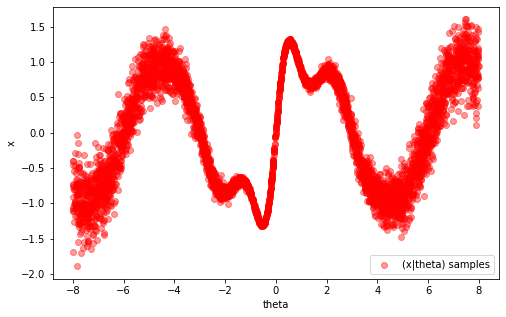

In [8]:
target = Wave()
num_samples = 50000
theta = target.sample_prior(num_samples)
target.target_visual()
x = target.simulate(theta)

In [9]:
model = ConditionalDIFDensityEstimator(x, theta,10,[10,10])
model.train(200, 5000)

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 200/200 [05:31<00:00,  1.66s/it, loss = -0.734371 ; device: cpu]


In [13]:
from matplotlib.colors import ListedColormap
import numpy as np
N=256
blue = np.ones((N, 4))
blue[:, 0] = np.geomspace(0.001 / 256, 1, N)  # R = 0
blue[:, 1] = np.geomspace(0.001 / 256, 1, N)  # G = 0
blue[:, 2] = np.geomspace(255 / 256, 1, N)  # B = 255
blue_cmap = ListedColormap(blue[::-1])

blue_color = "#0000FF"

<ipython-input-15-5f9eee034901>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(grid_theta, grid_x,torch.exp(density).detach().numpy(), cmap = blue_cmap)


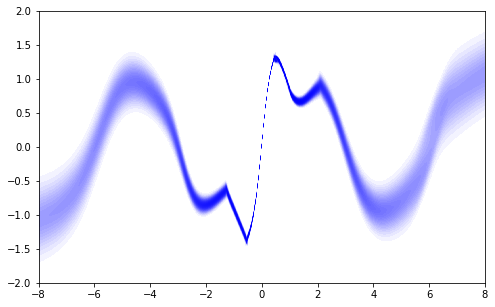

In [15]:
fig = plt.figure(figsize=(8,5))
theta_linspace = torch.linspace(-8.,8.,2000)
x_linspace = torch.linspace(-2.,2.,2000)
grid_theta,grid_x = torch.meshgrid(theta_linspace, x_linspace, indexing = 'ij')
density = model.log_density(grid_x.unsqueeze(-1), grid_theta.unsqueeze(-1))
plt.pcolormesh(grid_theta, grid_x,torch.exp(density).detach().numpy(), cmap = blue_cmap)

In [8]:
x_samples = model.sample_model(theta)

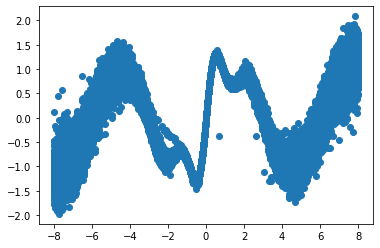

In [9]:
plt.scatter(theta[:, 0].numpy(), x_samples[:, 0].numpy(), color = blue_color)